In [1]:
#Importing required libraries

import numpy as np
import tensorflow as tf
import keras

In [2]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten, BatchNormalization

from keras.preprocessing.image import array_to_img, load_img

from keras.callbacks import EarlyStopping, ModelCheckpoint

from IPython.display import display
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [3]:
# Set a random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
#Importing keras hyperparameter tuning library
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.2 MB/s eta 0:00:00


In [5]:
from keras_tuner import HyperParameters, RandomSearch

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 1602s 9us/step


In [7]:
from keras.utils import to_categorical

#Assuming y_train is a 1D array of class labels
num_classes = 10  # Adjust to the number of classes in your problem
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)

In [8]:
#Create one hot ecoded test class of labels

y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

In [9]:
#Instantiate a sequential model

model = Sequential()

In [10]:
#Examining the feature arrays

X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

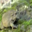

In [11]:
#Examining one array in the test set

pic = array_to_img(X_train[6754])
display(pic)

In [12]:
#Examining the label arrays

y_train.shape, y_test.shape

((50000, 1), (10000, 1))

In [13]:
y_train[6754]

array([6], dtype=uint8)

In [ ]:
# Define an EarlyStopping callback with a monitor set to 'val_loss'
# This callback will monitor the validation loss during training
# If the validation loss does not improve for 5 consecutive epochs (patience=5),
# training will be stopped early to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
# Convolutional layer with 128 filters, kernel size 3, input shape (32, 32, 3), ReLU activation, and same padding
model.add(Conv2D(128, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))

# Dropout layer with a dropout rate of 0.5
model.add(Dropout(0.5))

# Convolutional layer with 64 filters, kernel size 3, ReLU activation, and same padding
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))

# Dropout layer with a dropout rate of 0.25
model.add(Dropout(0.25))

# Another convolutional layer with 64 filters, kernel size 3, ReLU activation, and same padding
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))

# Dropout layer with a dropout rate of 0.25
model.add(Dropout(0.25))

# Another convolutional layer with 32 filters, kernel size 3, ReLU activation, and same padding
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))

# Dropout layer with a dropout rate of 0.25
model.add(Dropout(0.25))

# Another convolutional layer with 16 filters, kernel size 3, ReLU activation, and same padding
model.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))

# Flatten layer to convert the 3D feature maps to 1D feature vectors
model.add(Flatten())

# Dense (fully connected) layer with 10 units and softmax activation for multiclass classification
model.add(Dense(10, activation='softmax'))

# Compile the model with the Adam optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data (X_train) with corresponding one-hot encoded labels (y_train_one_hot)
# for 100 epochs, using 20% of the data for validation, and early stopping callback
history = model.fit(X_train, y_train_one_hot, epochs=100, validation_split=0.2, callbacks=[early_stopping])

# Plotting the training and validation accuracy over epochs
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])

In [ ]:
# Convolutional layer with 32 filters, kernel size (3, 3), ReLU activation, and input shape (32, 32, 3)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Batch Normalization layer to normalize and stabilize activations
model.add(BatchNormalization())

# Dropout layer with a dropout rate of 0.25 to prevent overfitting
model.add(Dropout(0.25))

# MaxPooling layer with pool size (2, 2) to downsample the spatial dimensions
model.add(MaxPool2D((2, 2)))

# Another Convolutional layer with 64 filters, kernel size (3, 3), and ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))

# Another Batch Normalization layer
model.add(BatchNormalization())

# Another Dropout layer with a dropout rate of 0.25
model.add(Dropout(0.25))

# Another MaxPooling layer
model.add(MaxPool2D((2, 2)))

# Another Convolutional layer with 64 filters, kernel size (3, 3), and ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))

# Another Batch Normalization layer
model.add(BatchNormalization())

# Flatten layer to convert the 3D feature maps to 1D feature vectors
model.add(Flatten())

# Fully connected layer with 64 units and ReLU activation
model.add(Dense(64, activation='relu'))

# Output layer with 10 units (for 10 classes) and softmax activation for multiclass classification
model.add(Dense(10, activation='softmax'))

# Compile the model with the Adam optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data (x_train) with corresponding one-hot encoded labels (y_train_one_hot)
# for 100 epochs, using 20% of the data for validation, and early stopping callback
history = model.fit(X_train, y_train_one_hot, epochs=100, validation_split=0.2, callbacks=[early_stopping])

# Plotting the training and validation accuracy over epochs
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])

In [ ]:
#Creating a single test sample, adding an extra dimension to the selected sample using np.expand_dims

test = np.expand_dims(X_test[3], axis=0)

#Generating predicting classes

model.predict(test)

# Get the predicted classes
predicted_class = predictions.argmax(axis=1)
predicted_class

In [ ]:
#Creating a single test sample, adding an extra dimension to the selected sample using np.expand_dims

test2 = np.expand_dims(X_test[765], axis=0)

#Generating predicting classes

predictions = model.predict(test2)

# Get the predicted classes
predicted_classes = predictions.argmax(axis=1)
predicted_classes

In [ ]:
#saving model

model.save("my_model.keras")

#Hyper Parameter Tuning

In [14]:
# Define a function to build a convolutional neural network (CNN) model with hyperparameter tuning
def build_model(hp):
    # Initialize a Sequential model
    model = Sequential()

    # Add the first convolutional layer with tunable parameters
    model.add(
        Conv2D(
            filters=hp.Int("first_layer_unit", min_value=32, max_value=512, step=32),
            kernel_size=hp.Int("kernel_size", min_value=2, max_value=4, step=1),
            activation="relu",
            input_shape=(32, 32, 3),
            padding=hp.Choice("padding", ["valid", "same"])
        )
    )

    # Add BatchNormalization to normalize and stabilize activations
    model.add(BatchNormalization())

    # Tune the number of additional layers dynamically
    for i in range(hp.Int("num_layers", 1, 9)):
        # Add convolutional layers with tunable parameters
        model.add(
            Conv2D(
                filters=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                activation="relu",
                padding=hp.Choice("padding", ["valid", "same"]),
                kernel_size=hp.Int("kernel_size", min_value=2, max_value=4, step=1)
            )
        )

    # Add Dropout layer if specified in hyperparameters
    if hp.Boolean("dropout"):
        model.add(Dropout(rate=0.25))

    # Flatten the output to prepare for fully connected layers
    model.add(Flatten())

    # Add a dense layer with 10 units (for 10 classes) and softmax activation for multiclass classification
    model.add(Dense(10, activation="softmax"))

    # Tune the learning rate using logarithmic sampling
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

    # Compile the model with the Adam optimizer, categorical crossentropy loss, and accuracy metric
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

    # Return the compiled model
    return model


# Instantiate the build_model function with default hyperparameters for demonstration
build_model(HyperParameters())

In [15]:
# Define a tuner using RandomSearch
tuner = RandomSearch(
    hypermodel=build_model,          # The hypermodel to be tuned, in this case, the build_model function
    objective="val_accuracy",        # The metric to optimize during hyperparameter search (validation accuracy)
    max_trials=5,                     # The total number of trials (different sets of hyperparameters) to run
    executions_per_trial=1,          # The number of times to train the model with different initializations for each trial
    overwrite=True,                   # Whether to overwrite the results of a previous tuning session in the same directory
    directory="my_dir",               # The directory to store the tuning results
    project_name="cifar_classification")  # The name of the tuning project, used to organize results within the directory

In [16]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
first_layer_unit (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
kernel_size (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 4, 'step': 1, 'sampling': 'linear'}
padding (Choice)
{'default': 'valid', 'conditions': [], 'values': ['valid', 'same'], 'ordered': False}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 9, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [18]:
tuner.search(X_train, y_train_one_hot, epochs=10, validation_split=0.2)

Trial 5 Complete [00h 13m 24s]
val_accuracy: 0.5575000047683716

Best val_accuracy So Far: 0.678600013256073
Total elapsed time: 00h 47m 14s
